# Import moduels and tools

In [1]:
import glob
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as plt_cm
from __future__ import division
from __future__ import print_function

from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap

% matplotlib inline

In [2]:
MATLAB_file=glob.glob('_data/Samples/GIPY11/*.mat')

In [3]:
GIPY11=scipy.io.loadmat(MATLAB_file[0])

In [4]:
INFO=GIPY11['INFO']
print(INFO)
#print(CTDPRS)

[ u'Longitude, Latitude, CTDPRS, CTDTMP, CTDSAL, Ba, TA, DIC, NO_3^-, NO_2^-, PO_4^{3-}']


In [5]:
CTDPRS=GIPY11['DATA'][:, 2]
CTDSAL=GIPY11['DATA'][:, 4]
Ba=GIPY11['DATA'][:, 5]
TA=GIPY11['DATA'][:, 6]
DIC=GIPY11['DATA'][:, 7]
NO3=GIPY11['DATA'][:, 8]
NO2=GIPY11['DATA'][:, 9]
PO4=GIPY11['DATA'][:, 10]

In [6]:
longitude=GIPY11['longitude']
latitude=GIPY11['latitude']
longitude.shape

(126L, 1L)

In [14]:
longitude.shape

(126L, 1L)

In [13]:
Ba.shape

(4740L,)

In [15]:
CTDPRS.shape

(4740L,)

# Available in suit points

In [7]:
# The transection based on my guest
pro0=[1, 23];
pro1=[38, 86];
pro2=[96, 125];

In [9]:
ETOPO2_Arctic=scipy.io.loadmat('_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

In [10]:
# Adjust resolution
res_unit=5
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1

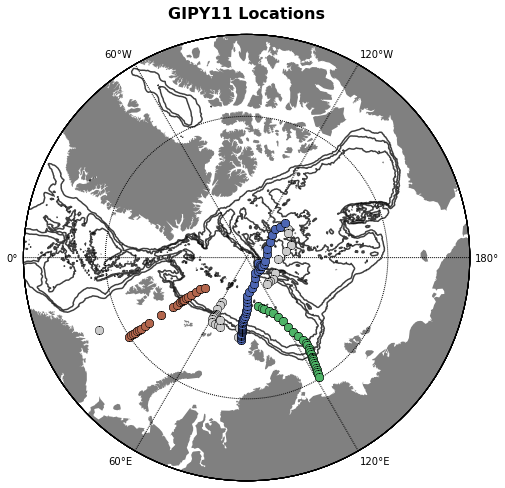

In [11]:
clevs=[1000, 2000, 3000]
# create figure, add axes
fig=plt.figure(figsize=(8, 8))
proj=Basemap(projection='npstere', resolution='l', \
            boundinglat=66.5, lon_0=90, round=True)
ax=plt.gca()
## define parallels and meridians to draw.
parallels=np.arange(-90, 90, 15)
meridians=np.arange(0, 360, 60)
proj.drawparallels(parallels, labels=[1, 1, 1, 1],\
                  fontsize=10, latmax=90)
proj.drawmeridians(meridians, labels=[1, 1, 1, 1],\
                  fontsize=10, latmax=90)
# draw coast & fill continents
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None) # coral
# compute native x,y coordinates of grid.
x, y=proj(longitude, latitude)
x_topo, y_topo=proj(lon_arctic, lat_arctic)
CS=proj.contour(x_topo, y_topo, topo_arctic, clevs, \
                linestyles='-', linewidths=1.5, colors=('k',), alpha=0.75)
proj.plot(x, y, linestyle='None', marker='o', markersize=8, mfc=[0.8, 0.8, 0.8], mec='k')
proj.plot(x[pro0[0]:pro0[1]], y[pro0[0]:pro0[1]], linestyle='None', marker='o', markersize=8, mfc=[0.7, 0.4, 0.3], mec='k')
proj.plot(x[pro1[0]:pro1[1]], y[pro1[0]:pro1[1]], linestyle='None', marker='o', markersize=8, mfc=[0.3, 0.4, 0.7], mec='k')
proj.plot(x[pro2[0]:pro2[1]], y[pro2[0]:pro2[1]], linestyle='None', marker='o', markersize=8, mfc=[0.3, 0.7, 0.4], mec='k')
ax.set_title('GIPY11 Locations', fontweight='bold', fontsize=16, y=1.025)
plt.show()

# Profiles

# Variation with Depth

# Tracer Relationships

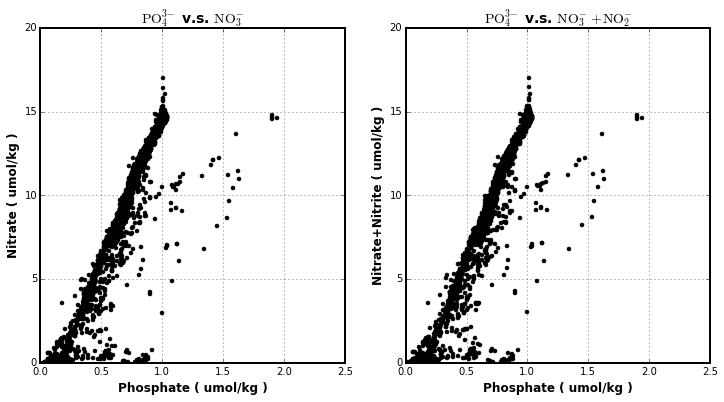

In [16]:
fig=plt.figure(figsize=(12, 6))

ax1=plt.subplot2grid((1, 2), (0, 0))
ax2=plt.subplot2grid((1, 2), (0, 1))

ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 20)
ax1.plot(PO4, NO3, linestyle='None', marker='o', markersize=4, color='k')
ax1.set_xlabel('Phosphate ( umol/kg )', fontsize=12, fontweight='bold')
ax1.set_ylabel('Nitrate ( umol/kg )', fontsize=12, fontweight='bold')
ax1.set_title('$\mathrm{PO_4^{3-}}$ v.s. $\mathrm{NO_3^{-}}$', fontsize=14, fontweight='bold')

ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 20)
ax2.plot(PO4, NO3+NO2, linestyle='None', marker='o', markersize=4, color='k')
ax2.set_xlabel('Phosphate ( umol/kg )', fontsize=12, fontweight='bold')
ax2.set_ylabel('Nitrate+Nitrite ( umol/kg )', fontsize=12, fontweight='bold')
ax2.set_title('$\mathrm{PO_4^{3-}}$ v.s. $\mathrm{NO_3^{-}+NO_2^{-}}$', fontsize=14, fontweight='bold')

ax1.grid()
ax2.grid()

[i.set_linewidth(2) for i in ax1.spines.itervalues()]
[i.set_linewidth(2) for i in ax2.spines.itervalues()]

plt.show()

<img src="_figures/02_Yamamoto2008_fig1.png" width=650 align="left"/>

In [17]:
lim_TA=[np.nanmin(TA), np.nanmax(TA)]
lim_DIC=[np.nanmin(DIC), 2550]

In [18]:
bin_TA=np.linspace(lim_TA[0], lim_TA[1], 75, dtype=np.float)
bin_DIC=np.linspace(lim_DIC[0], 2550, 75, dtype=np.float)

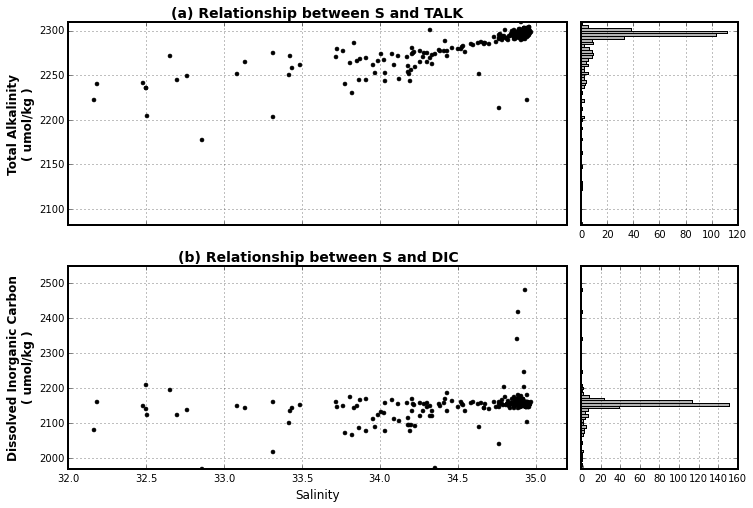

In [19]:
fig=plt.figure(figsize=(12, 8))
#fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 8), sharex=True)

ax1=plt.subplot2grid((2, 8), (0, 0), colspan=6)
ax2=plt.subplot2grid((2, 8), (1, 0), colspan=6)
ax3=plt.subplot2grid((2, 8), (0, 6), colspan=2)
ax4=plt.subplot2grid((2, 8), (1, 6), colspan=2)

ax1.set_xlim(32, 35.2)
ax1.set_ylim(lim_TA[0], lim_TA[1])
L1=ax1.plot(CTDSAL, TA, linestyle='None', marker='o', markersize=4, color='k')
ax1.set_ylabel('Total Alkalinity\n( umol/kg )', fontsize=12, fontweight='bold')
ax1.set_title('(a) Relationship between S and TALK', fontweight='bold', fontsize=14)

ax3.set_ylim(lim_TA[0], lim_TA[1])
ax3.hist(TA, bins=bin_TA, color=[0.7, 0.7, 0.7], orientation='horizontal')

ax2.set_xlim(32, 35.2)
ax2.set_ylim(lim_DIC[0], 2550)
L2=ax2.plot(CTDSAL, DIC, linestyle='None', marker='o', markersize=4, color='k')
ax2.set_xlabel('Salinity', fontsize=12)
ax2.set_ylabel('Dissolved Inorganic Carbon\n( umol/kg )', fontsize=12, fontweight='bold')
ax2.set_title('(b) Relationship between S and DIC', fontweight='bold', fontsize=14)

ax4.set_ylim(lim_DIC[0], 2550)
ax4.hist(DIC, bins=bin_DIC, color=[0.7, 0.7, 0.7], orientation='horizontal')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.axes.xaxis.set_ticklabels([])
ax3.axes.yaxis.set_ticklabels([])
ax4.axes.yaxis.set_ticklabels([])

[i.set_linewidth(2) for i in ax1.spines.itervalues()]
[i.set_linewidth(2) for i in ax2.spines.itervalues()]
[i.set_linewidth(2) for i in ax3.spines.itervalues()]
[i.set_linewidth(2) for i in ax4.spines.itervalues()]

plt.show()

<img src="_figures/02_Yamamoto2008_fig2.png" width=650 align="left"/>